In [52]:
import numpy as np
import h5py
import pandas as pd
import os
import fnmatch

import librosa # Pour l'extraction des features et la lecture des fichiers wav
import librosa.display # Pour récupérer les spectrogrammes des audio
import librosa.feature
import matplotlib.pyplot as plt
%matplotlib inline

**Ce code va service à créer un dataframe avec tout les songs pour afin de générer un csv qui va servir à traiter les données contenus dans les fichiers h5**

In [37]:
directory_path = './Data/MillionSongSubset'
data_list = []

In [38]:


# for root, dirnames, filenames in os.walk(directory_path):
#     for filename in filenames:
#         if filename.endswith('.h5'):
#             hdf_file_path = os.path.join(root, filename)
#             hdf = h5py.File(hdf_file_path, 'r')

#             analysis_data = hdf['/analysis/songs/'][:]
#             metadata_data = hdf['/metadata/songs/'][:]
#             musicbrainz_data = hdf['/musicbrainz/songs/'][:]

#             combined_data = pd.concat([pd.DataFrame(analysis_data), pd.DataFrame(metadata_data), pd.DataFrame(musicbrainz_data)], axis=1)
            
#             data_list.append(combined_data)
            
#             hdf.close()

# final_data = pd.concat(data_list, ignore_index=True)

In [39]:
# csv_file_path = 'MSD2.csv'
# final_data.to_csv(csv_file_path, index=False, encoding='utf-8')

In [45]:
spec_list = []

for root, dirnames, filenames in os.walk(directory_path):
    for filename in filenames:
        if filename.endswith('.h5'):

            hdf_file_path = os.path.join(root, filename)
            f = h5py.File(hdf_file_path, 'r')
                
            # for key in f.keys():
            #     print(key)
                
            analysis = f['analysis']
            metadata = f['metadata']
            musicbrainz = f['musicbrainz']
            
            # for key in analysis.keys():
            #     print(key)

            # Charger les données spécifiques sous 'segments_pitches' et 'segments_timbre'
            if 'segments_pitches' in analysis and 'segments_timbre' in analysis:
                segments_pitches = analysis['segments_pitches'][:]
                segments_timbre = analysis['segments_timbre'][:]
                segments_loudness_start = analysis['segments_loudness_start'][:]
                
                # Traiter et assembler les données
                audio_features = np.concatenate((segments_pitches, segments_timbre), axis=0)
                
                # Calculer le spectrogramme à partir des données prétraitées
                D = librosa.power_to_db(audio_features, ref=np.max)
                
                # Ajouter le spectrogramme à la liste
                spec_list.append(D)
        
            f.close()



In [47]:
spec_list[0]

array([[-25.24728128, -26.65563163, -26.68749491, ..., -26.36108184,
        -25.00619265, -26.3021536 ],
       [-45.00619265, -37.68225505, -43.24528006, ..., -45.97529278,
        -44.21438019, -42.70170343],
       [-30.29327554, -25.03670016, -25.00619265, ..., -34.79429966,
        -36.94439291, -32.21865664],
       ...,
       [-11.12944749, -80.        , -80.        , ..., -15.40719677,
        -80.        , -33.80045334],
       [ -8.81306754,  -9.66110877, -80.        , ..., -11.68362641,
         -9.66732867, -80.        ],
       [ -9.30134702,  -4.17726232, -80.        , ..., -12.14320014,
        -80.        , -12.7198796 ]])

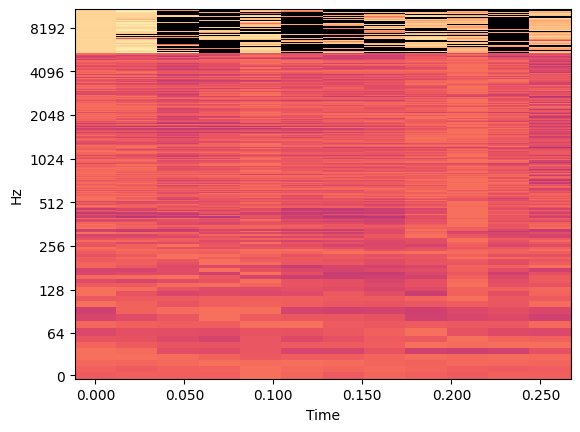

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [59]:
analysis_sample_rate = 22050
librosa.display.specshow(spec_list[1000], sr=analysis_sample_rate, x_axis='time', y_axis='log')
plt.show()

In [ ]:
# # Liste pour stocker les spectrogrammes
# spec_list = []

# # Fréquence d'échantillonnage des données audio
# analysis_sample_rate = 22050

# for root, dirnames, filenames in os.walk(directory_path):
#     for filename in filenames:
#         if filename.endswith('.h5'):
#             hdf_file_path = os.path.join(root, filename)
            
#             # Ouverture du fichier HDF5
#             with h5py.File(hdf_file_path, 'r') as f:
#                 # Parcours des clés dans 'analysis'
#                 metadata_group = f['analysis']
#                 for key in metadata_group.keys():
#                     if key.startswith('segments_'):
#                         # Charger les données spécifiques
#                         data = metadata_group[key][:]
                        
#                         # Traiter les données si nécessaire
                        
#                         # Calculer le spectrogramme à partir des données
#                         D = librosa.power_to_db(data, ref=np.max)
                        
#                         # Ajouter le spectrogramme à la liste
#                         spec_list.append(D)

# # Afficher le premier spectrogramme de la liste
# librosa.display.specshow(spec_list[0][0], sr=analysis_sample_rate, x_axis='time', y_axis='log')
# plt.show()

IndexError: tuple index out of range

In [ ]:
# spec_list = []

# for root, dirnames, filenames in os.walk(directory_path):
#     for filename in filenames:
#         if filename.endswith('.h5'):

#             hdf_file_path = os.path.join(root, filename)
#             f = h5py.File(hdf_file_path, 'r')
            
            
#             list(f.keys())

#             for e in list(f.keys()) :
#                 print('\n')
#                 print(e,'=>',list(f[e].keys()))
                
#             analysis = f['analysis']
#             metadata = f['metadata']
#             musicbrainz = f['musicbrainz']


#             # Charger les données spécifiques
#             segments_pitches = analysis['songs'][:]
#             segments_timbre = metadata['songs'][:]
#             segments_loudness_start = musicbrainz['songs'][:]

#             analysis_sample_rate = 22050

#             # Traiter et assembler les données (exemple simple)
#             audio_features = np.concatenate((segments_pitches, segments_timbre), axis=0)
#             # Calculer le spectrogramme à partir des données prétraitées
#             D = librosa.power_to_db(audio_features, ref=np.max)
            
#             spec_list.append(D)
            
#             f.close()

# librosa.display.specshow(spec_list[0][0], sr=analysis_sample_rate, x_axis='time', y_axis='log')
# plt.show()